In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
lcdf = pd.read_csv("/Users/samcons/Downloads/loan.csv", low_memory=False)
lcdf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [21]:
lcdf.shape

(39717, 111)

In [4]:
lcdf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
lcdf.dropna(axis = 1, how = 'all', inplace = True)
lcdf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
lcdf.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [7]:
lcdf = lcdf.apply(lambda col: col if len(col.unique()) > 1 else None)
lcdf.dropna(axis=1, how='all', inplace=True)
lcdf.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0


In [8]:
missing_columns = lcdf.columns[100*(lcdf.isnull().sum()/len(lcdf.index)) > 60]
print(missing_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [9]:
lcdf = lcdf.drop(missing_columns, axis=1)
print(lcdf.shape)


(39717, 48)


In [10]:
lcdf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [10]:
lcdf = lcdf.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt","chargeoff_within_12_mths"], axis = 1)
lcdf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,pub_rec_bankruptcies,tax_liens
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,27.65,Jan-85,1,3,0,83.70%,9,0.0,0.0,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,1.00,Apr-99,5,3,0,9.40%,4,0.0,0.0,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,8.72,Nov-01,2,2,0,98.50%,10,0.0,0.0,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,20.00,Feb-96,1,10,0,21%,37,0.0,0.0,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,17.94,Jan-96,0,15,0,53.90%,38,0.0,0.0,0.0


In [11]:
lcdf.columns
lcdf.shape

(39717, 24)

In [12]:
lcdf = lcdf.drop(["tax_liens", "collections_12_mths_ex_med", "pub_rec_bankruptcies"], axis=1)
lcdf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [13]:
lcdf = lcdf[lcdf["loan_status"] != 'Current']
lcdf.loan_status.unique()


array(['Fully Paid', 'Charged Off'], dtype=object)

In [39]:
lcdf.shape

(38577, 21)

In [14]:
(lcdf.isna().sum()/len(lcdf.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [15]:
#columns with missing values are emp_length and revol_util
#Standardizing them
print("Mode : " + lcdf.emp_length.mode()[0])
lcdf.emp_length.value_counts()


Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [16]:
lcdf.emp_length.fillna(lcdf.emp_length.mode()[0], inplace = True)
lcdf.emp_length.isna().sum()

0

In [17]:
lcdf.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
lcdf.revol_util.isna().sum()


0

In [21]:
lcdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null  obje

In [25]:
lcdf.revol_util = lcdf.revol_util.astype(str)
lcdf.revol_util = pd.to_numeric(lcdf.revol_util.apply(lambda x : x.split('%')[0]))

In [27]:
lcdf.int_rate = pd.to_numeric(lcdf.int_rate.apply(lambda x : x.split('%')[0]))

In [28]:
lcdf.emp_length = pd.to_numeric(lcdf.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [29]:
lcdf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


<Axes: >

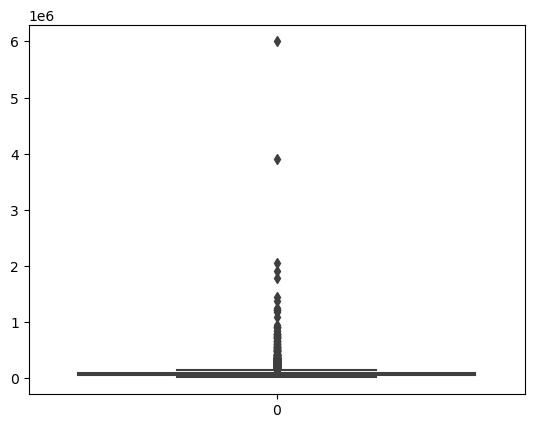

In [31]:
#outlier treatment
sns.boxplot(lcdf['annual_inc'])


In [32]:
quantile_info = lcdf.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

<Axes: >

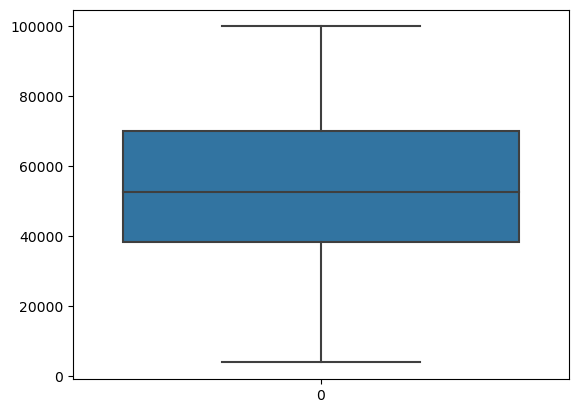

In [35]:
per_95_annual_inc = lcdf['annual_inc'].quantile(0.95)
lcdf = lcdf[lcdf.annual_inc <= per_95_annual_inc]
sns.boxplot(lcdf.annual_inc)

In [36]:
#Let's analyze other numerical variables which could possibly have outliers.
#dti
#loan_amnt
#funded_amnt_inv


<Axes: >

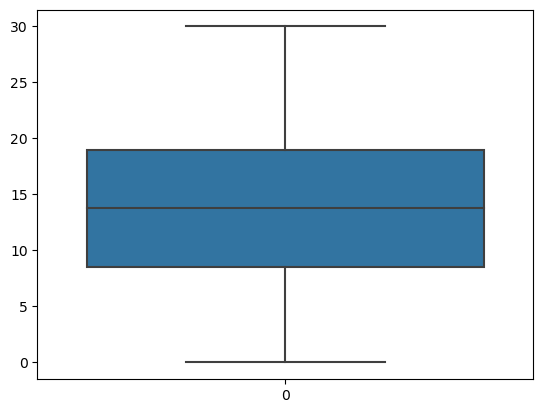

In [37]:
sns.boxplot(lcdf.dti)

<Axes: >

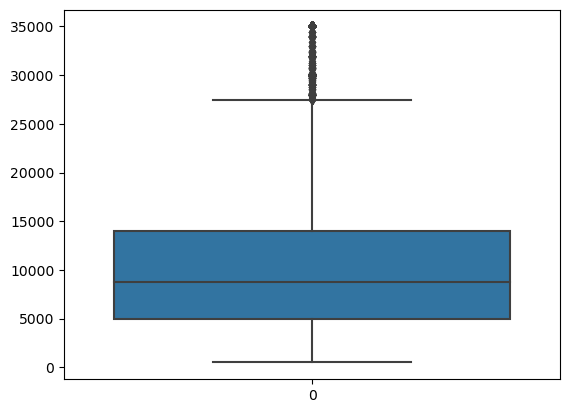

In [38]:
sns.boxplot(lcdf.loan_amnt)

In [39]:
lcdf.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14000.0
0.900    20000.0
0.950    24000.0
0.970    25000.0
0.975    25000.0
0.980    27050.0
0.990    31000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

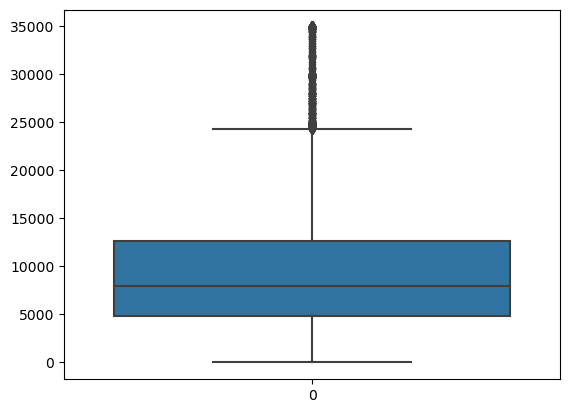

In [40]:
sns.boxplot(lcdf.funded_amnt_inv)


In [41]:
lcdf.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])


0.500     8000.000000
0.750    12625.000000
0.900    18200.000000
0.950    22000.000000
0.970    24703.984621
0.975    24950.000000
0.980    25000.000000
0.985    27581.201846
0.990    29975.000000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [42]:
#Visualizing Categorical Data

In [47]:
lcdf.sub_grade = pd.to_numeric(lcdf.sub_grade.apply(lambda x : str(x)[-1]))
lcdf.sub_grade.head()


0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

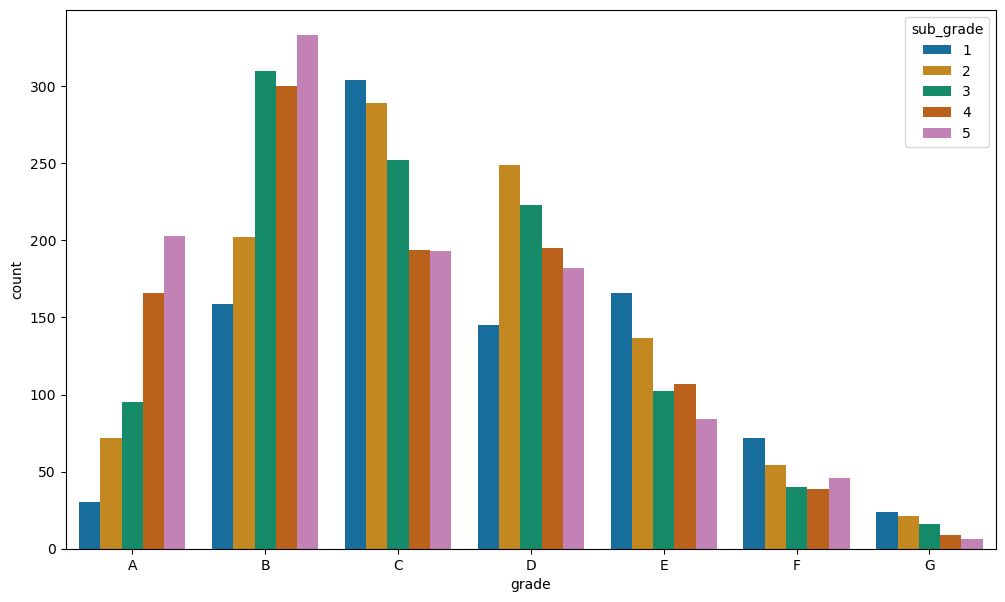

In [53]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = lcdf[lcdf.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

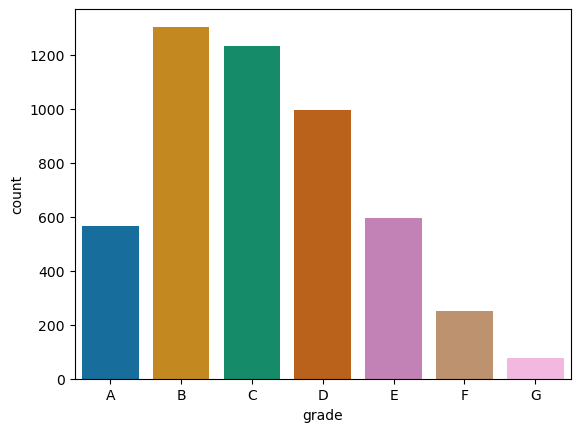

In [54]:
sns.countplot(x = 'grade', data = lcdf[lcdf.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


In [55]:
#Analyzing home_ownership

In [56]:
lcdf['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [57]:
#replacing NONE with OTHER
lcdf['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
lcdf['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

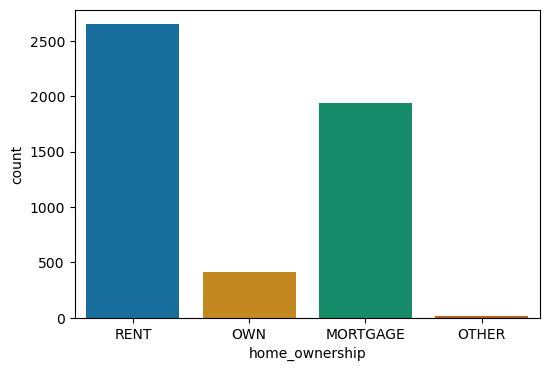

In [61]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='home_ownership', data=lcdf[lcdf['loan_status']=='Charged Off'])

In [63]:
#Analyzing Purpose

<Axes: xlabel='count', ylabel='purpose'>

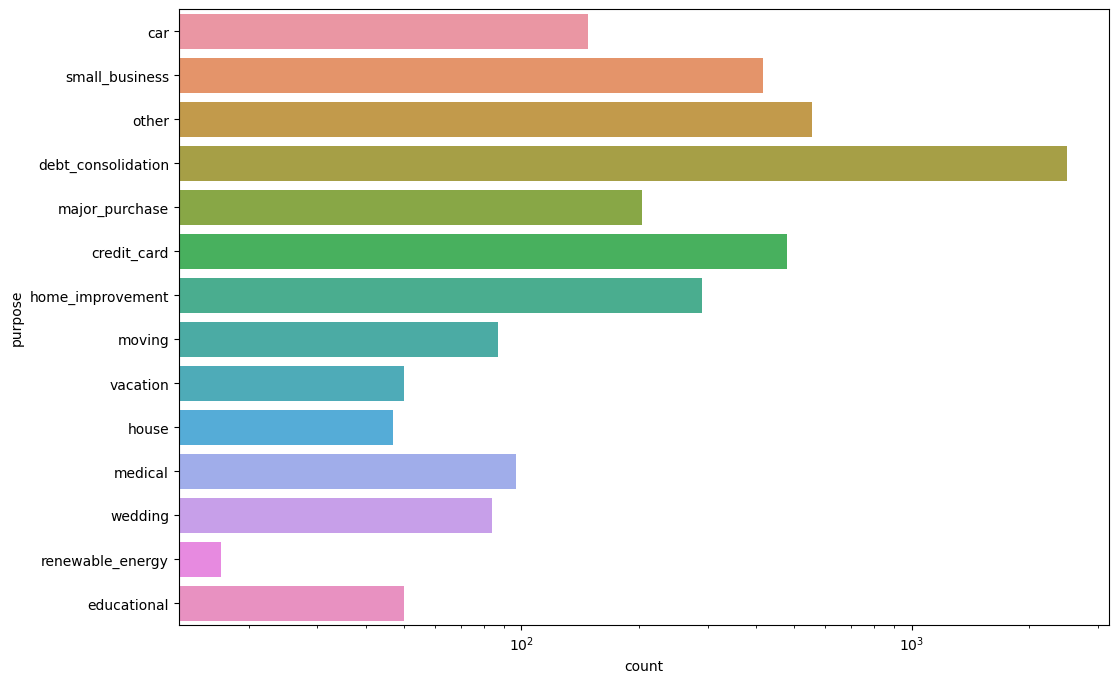

In [66]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=lcdf[lcdf.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

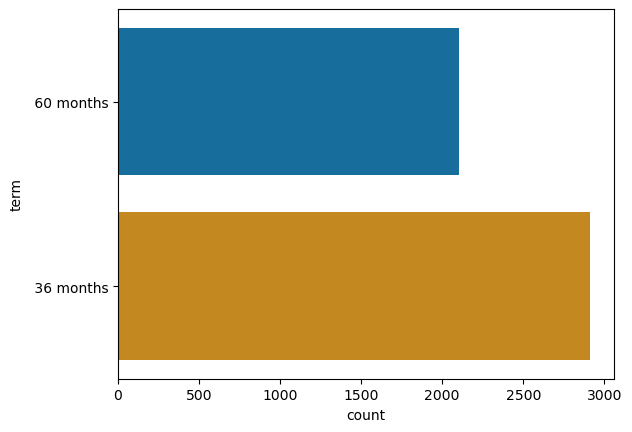

In [67]:
#analyzing Term
sns.countplot(y='term', data=lcdf[lcdf['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

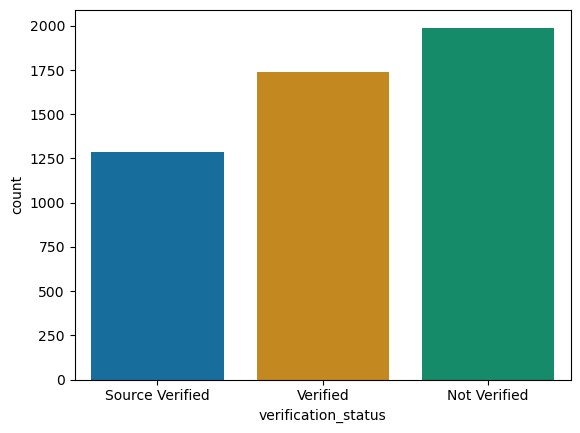

In [69]:
#Analyzing Verification_status
sns.countplot(x='verification_status', data=lcdf[lcdf['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

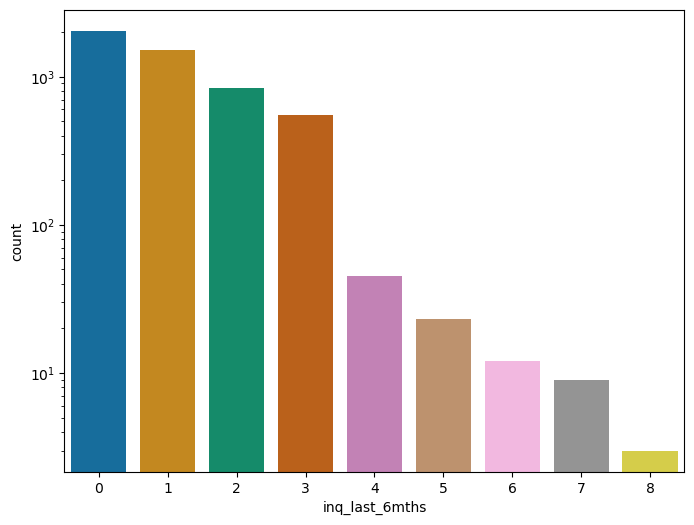

In [78]:
#Analyzing inq_last_6mths
fig,ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=lcdf[lcdf['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

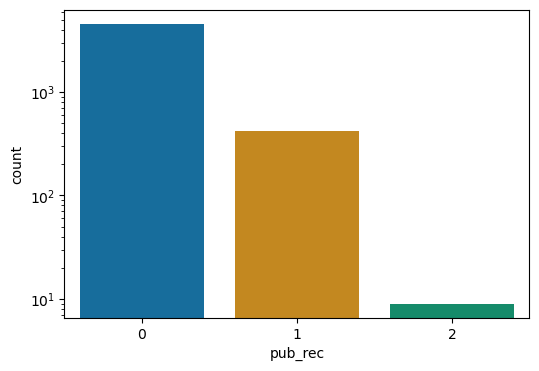

In [82]:
fig,ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=lcdf[lcdf['loan_status']=='Charged Off'])

In [83]:
#Analyzing by issued month and year

In [86]:
df_month_year = lcdf['issue_d'].str.partition("-", True)     
lcdf['issue_month']=df_month_year[0]                       
lcdf['issue_year']='20' + df_month_year[2]
lcdf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

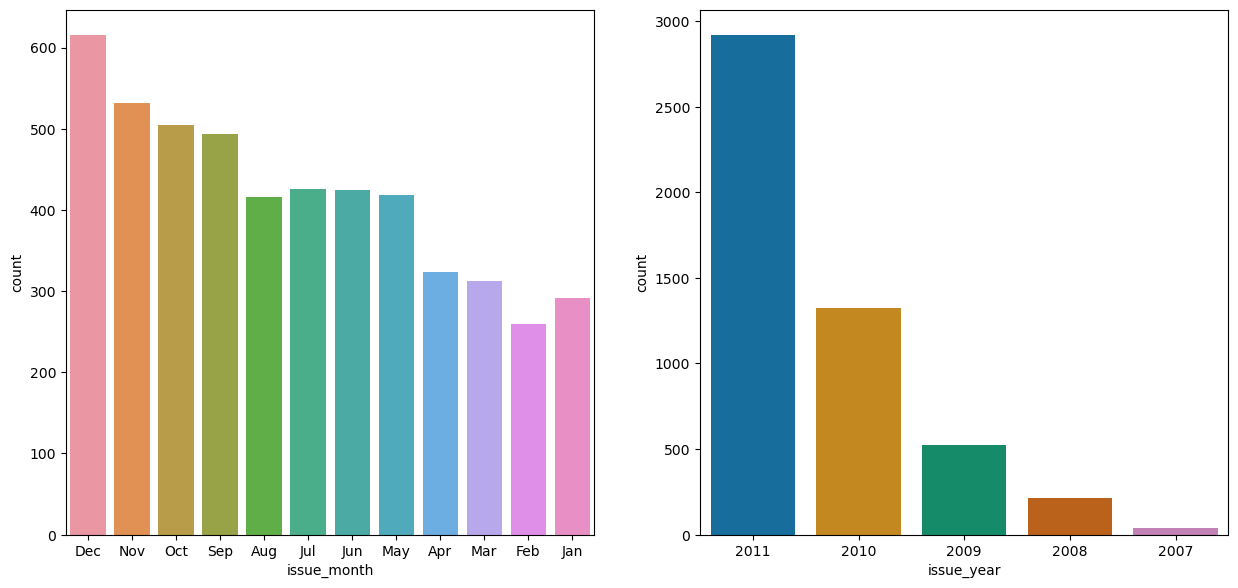

In [88]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=lcdf[lcdf['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=lcdf[lcdf['loan_status']=='Charged Off'])

In [89]:
#Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years
#Analyzing installment,dti, loan_amnt

In [90]:
lcdf['installment_groups'] = pd.cut(lcdf['installment'], bins=10,precision =0,labels=['15-140','141-275','276-400','401-530','531-660','660-790-','791-920','921-1050','1051-1175','1176-1305'])
lcdf['funded_amnt_inv_group'] = pd.cut(lcdf['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
lcdf['loan_amnt_groups'] = pd.cut(lcdf['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lcdf['dti_groups'] = pd.cut(lcdf['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='installment_groups', ylabel='count'>

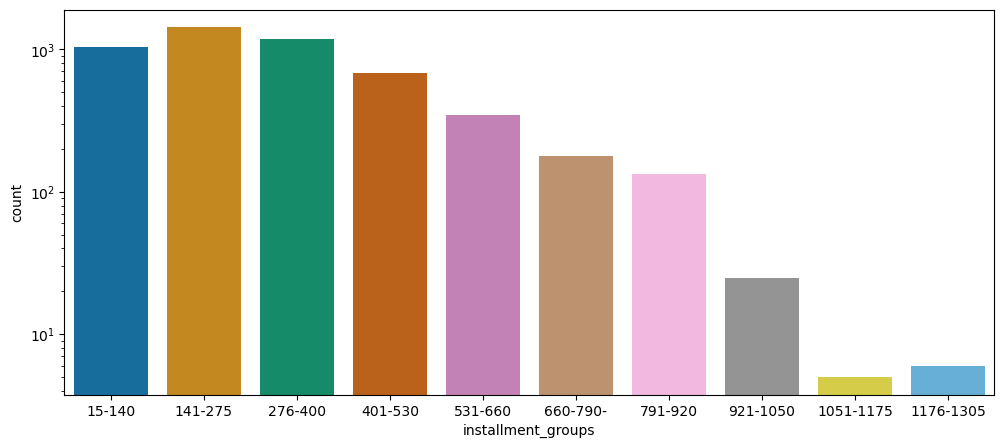

In [94]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=lcdf[lcdf['loan_status']=='Charged Off'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

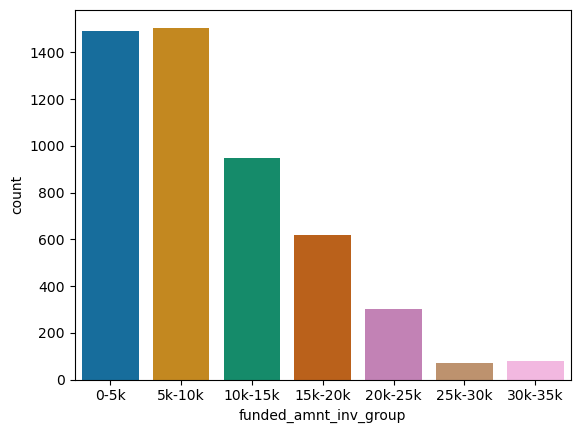

In [95]:
sns.countplot(x='funded_amnt_inv_group', data=lcdf[lcdf['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

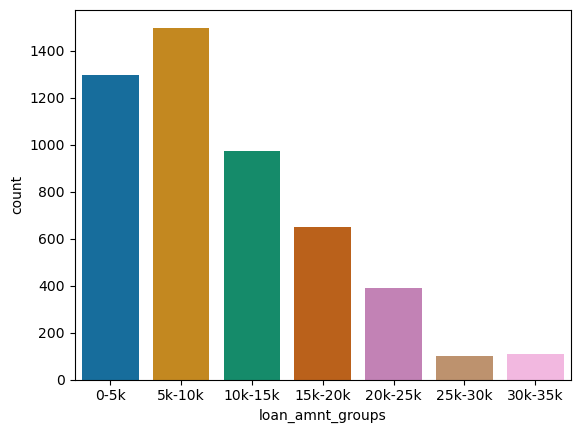

In [96]:
sns.countplot(x='loan_amnt_groups', data=lcdf[lcdf['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

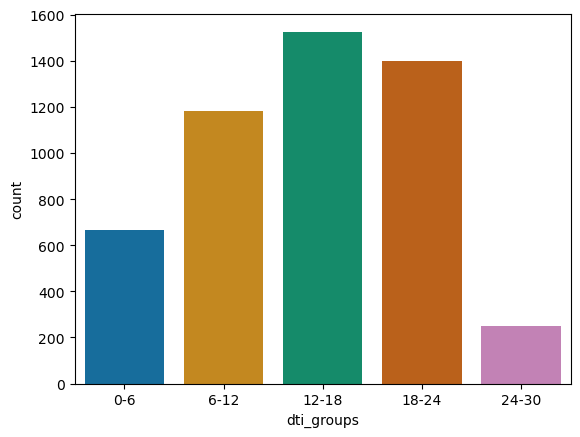

In [97]:
sns.countplot(x='dti_groups', data=lcdf[lcdf['loan_status']=='Charged Off'])

In [98]:
#Analysing annual income with other columns for more insights

In [100]:
#1.Annual income vs loan purpose

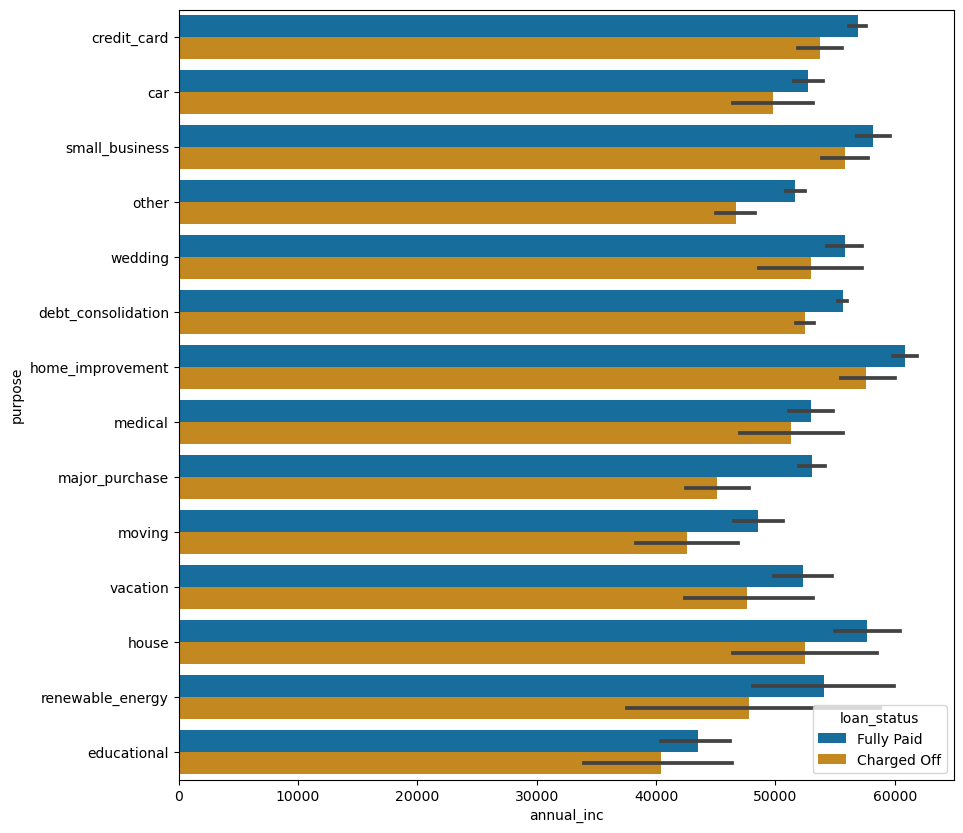

In [102]:
plt.figure(figsize=(10,10))
sns.barplot(data =lcdf,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

In [103]:
#Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.
#Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

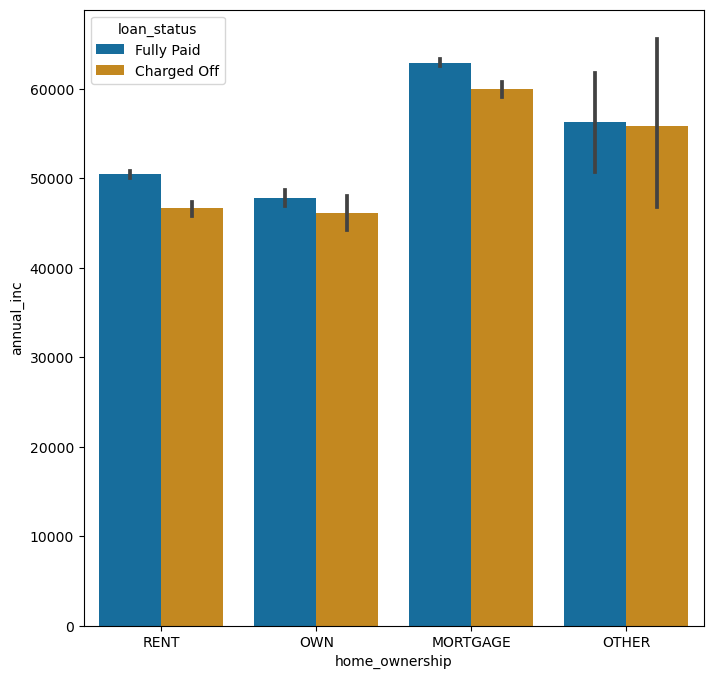

In [105]:
#2.Annual income vs home ownership
plt.figure(figsize=(8,8))
sns.barplot(data =lcdf,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.show()

In [108]:
# 3.Annual Income vs Loan amount
#sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = lcdf)

In [109]:
#3. Annual income vs int_rate
#plt.figure(figsize=(10,10))
#sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
#plt.show()

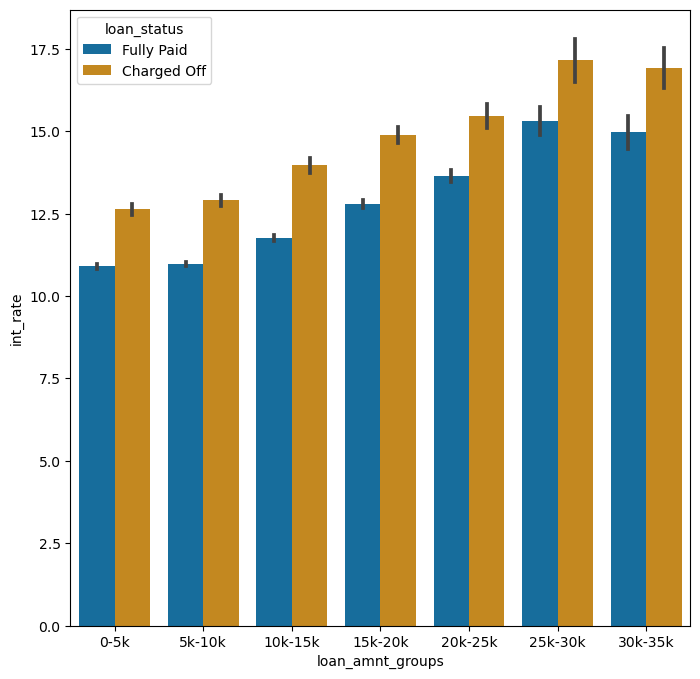

In [111]:
#Analysing loan_amount with other columns for more insights
#1.Loan Amount vs Interest Rate
plt.figure(figsize=(8,8))
sns.barplot(data =lcdf,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.show()

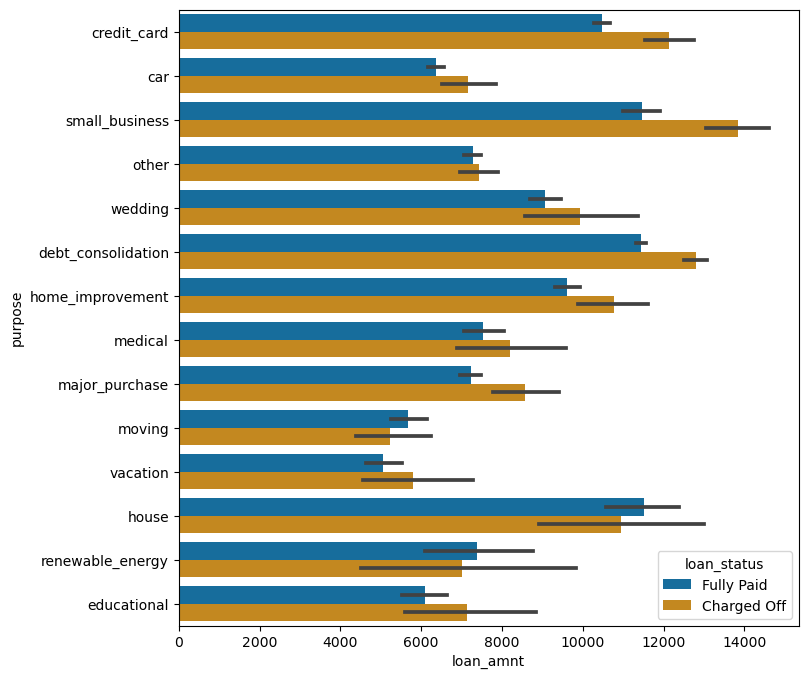

In [112]:
#2.Loan vs Loan purpose
plt.figure(figsize=(8,8))
sns.barplot(data =lcdf,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

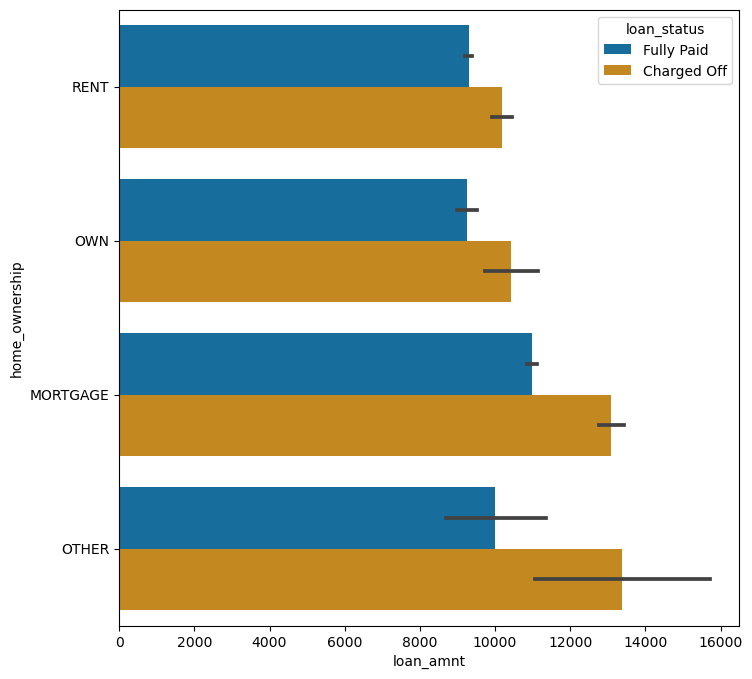

In [115]:
#3.Loan vs House Ownership
plt.figure(figsize=(8,8))
sns.barplot(data =lcdf,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()


<Axes: xlabel='issue_year', ylabel='loan_amnt'>

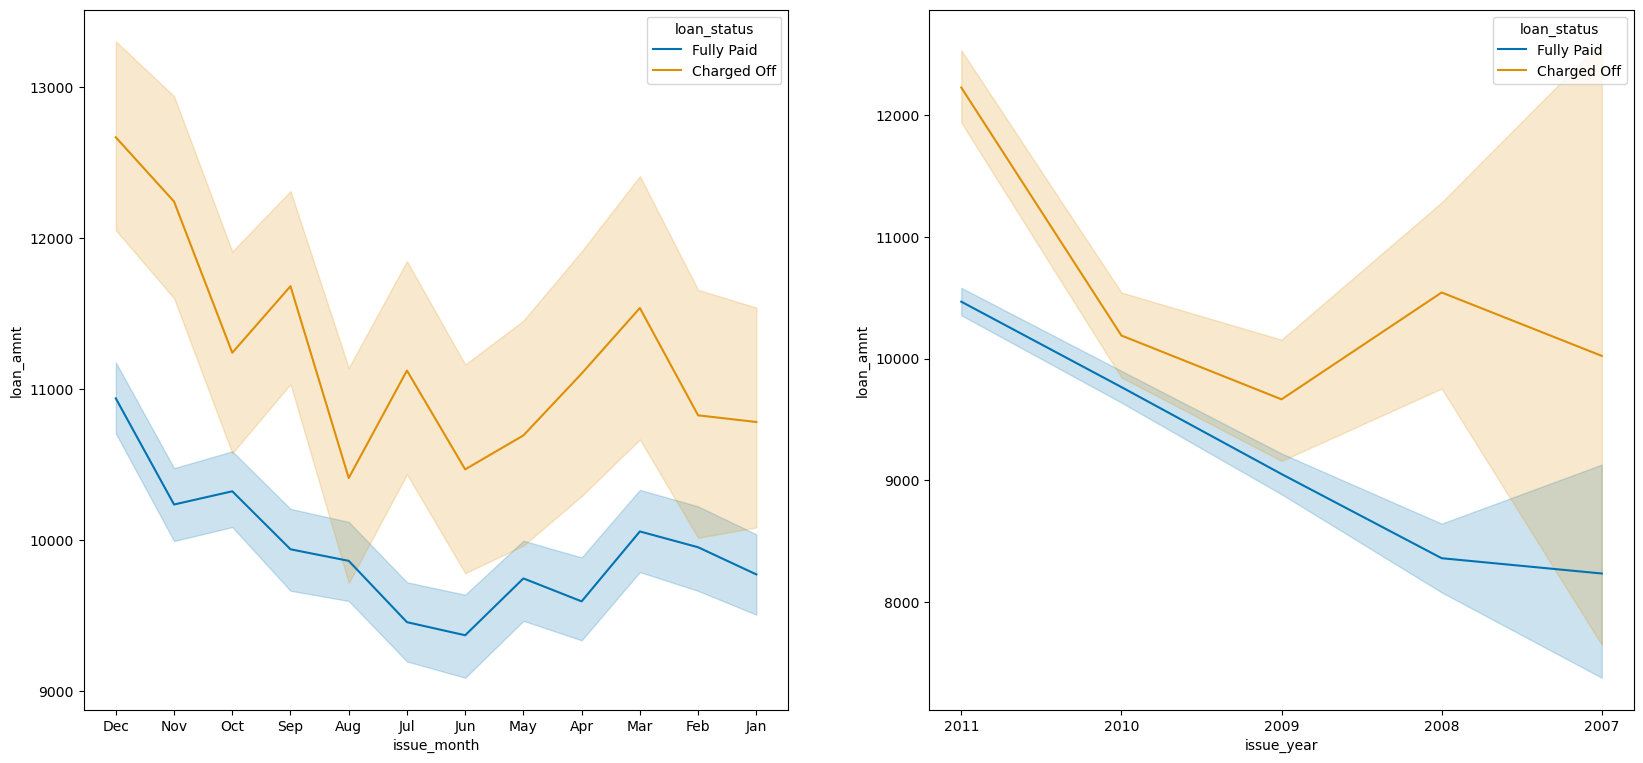

In [116]:
#4.Loan amount vs month issued and year issued
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =lcdf,y='loan_amnt', x='issue_month', hue ='loan_status')
plt.subplot(222)
sns.lineplot(data =lcdf,y='loan_amnt', x='issue_year', hue ='loan_status')

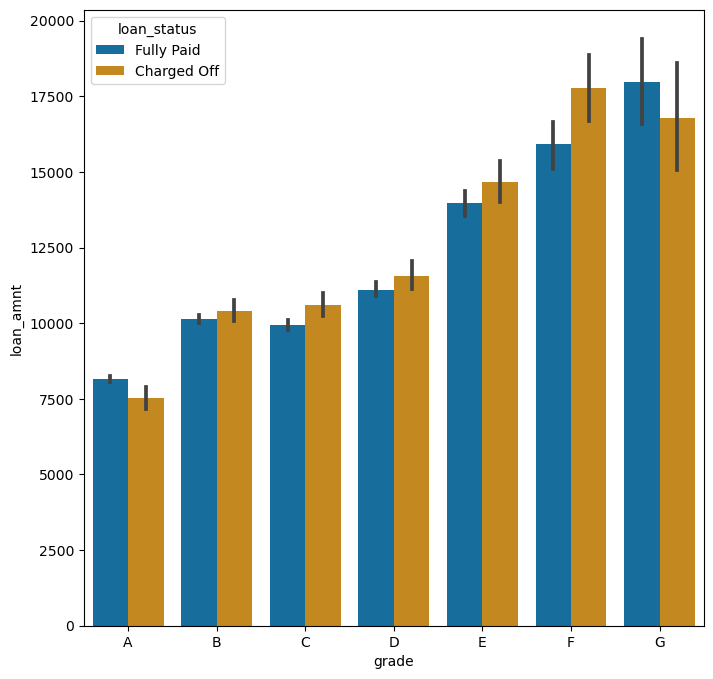

In [118]:
#5.Loan amount vs Grade
plt.figure(figsize=(8,8))
sns.barplot(data =lcdf,x='grade', y='loan_amnt', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

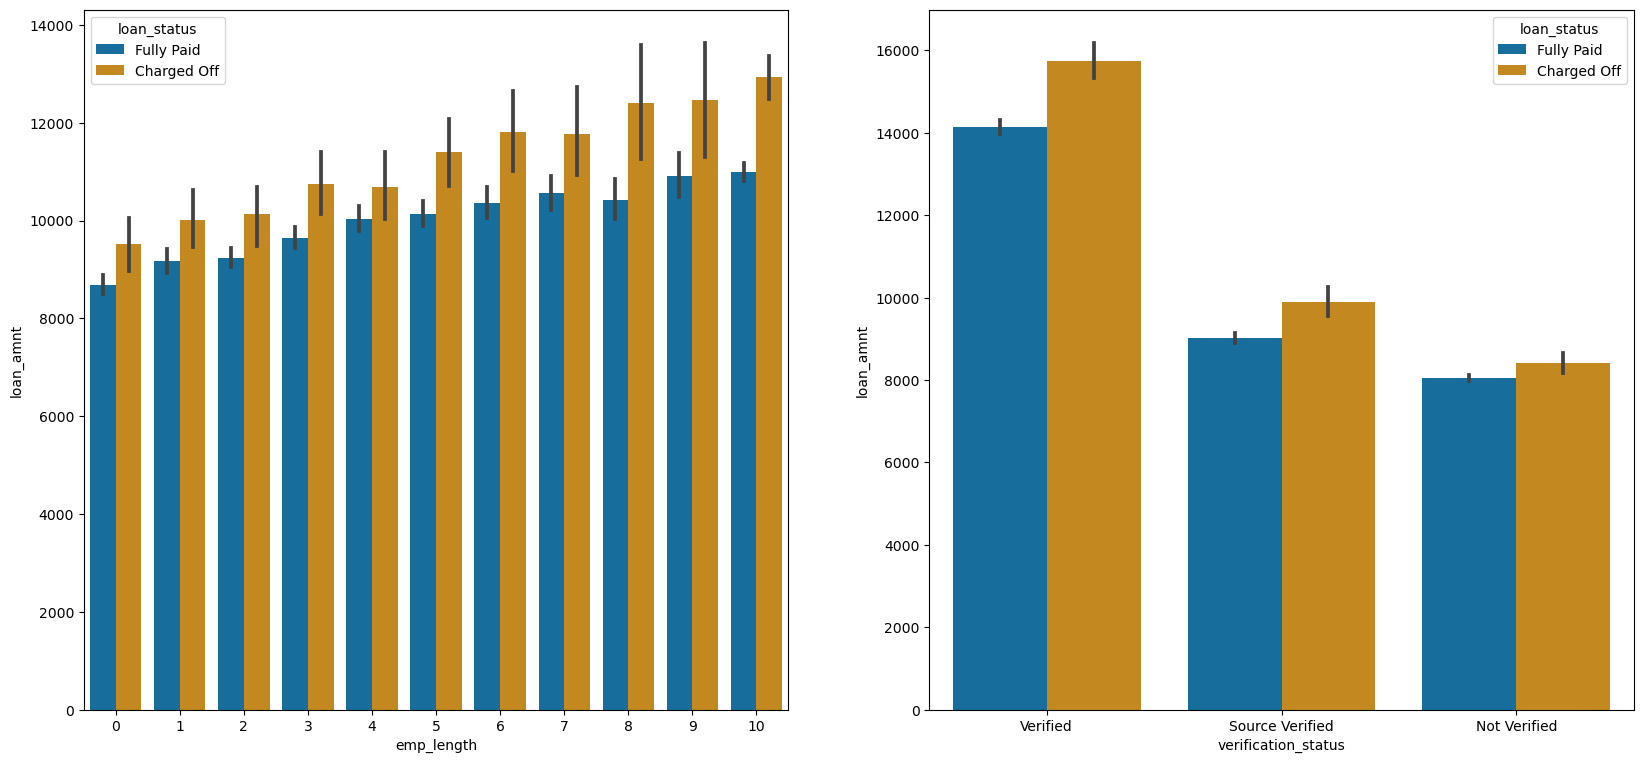

In [119]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =lcdf,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.subplot(222)
sns.barplot(data =lcdf,y='loan_amnt', x='verification_status', hue ='loan_status')

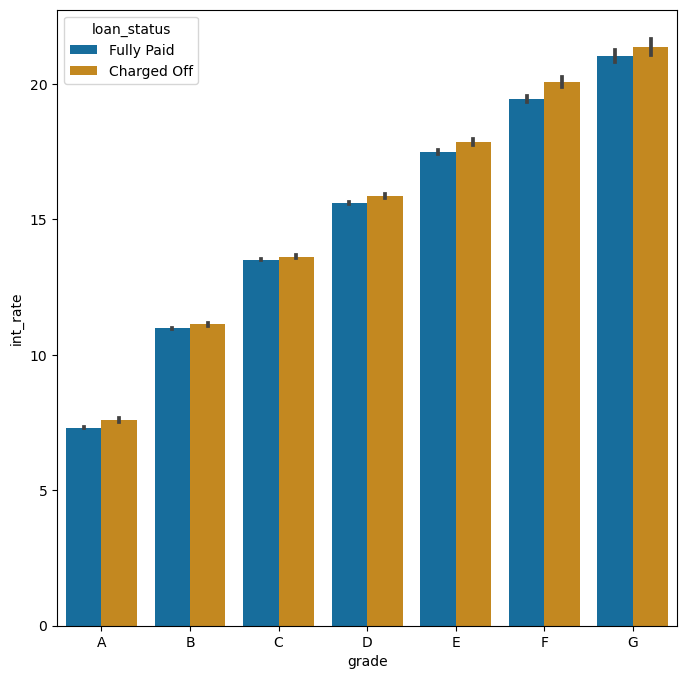

In [121]:
#Employees with longer working history got the loan approved for a higher amount.
#Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.
#grade vs interest rate
plt.figure(figsize=(8,8))
sns.barplot(data =lcdf,x='grade', y='int_rate', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

/Users/samcons/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


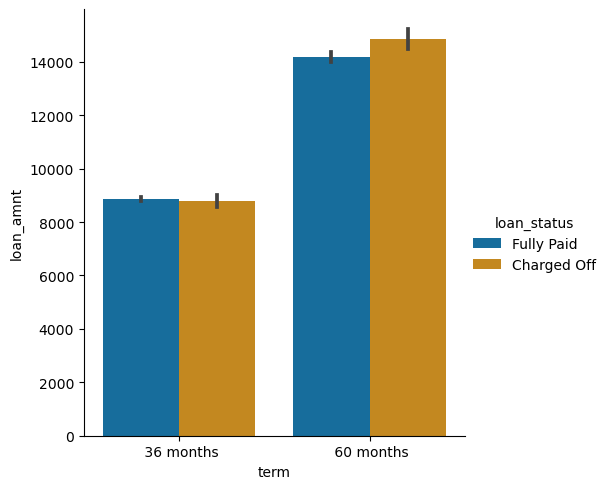

In [122]:
#The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
#This can be a pretty strong driving factor for loan defaulting.
sns.catplot(x = 'term', y = 'loan_amnt', data = lcdf,hue = 'loan_status', kind = 'bar')

In [ ]:
#Applicants who applied and defaulted have no significant difference in loan_amounts.
#Which means that applicants applying for long term has applied for more loan.